In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import json
import csv
import math

In [11]:
def load_file(file_name):
  with open(file_name) as file:
      data = json.load(file)
  return data

def save_csv(result, filename):
  with open(filename, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(list(result.keys()))
    writer.writerow(list(result.values()))

def plot_data(result, filename):
  x_data = []
  y_data = []

  for item in result:
    x_data.append(item)
    y_data.append(result[item])

  plt.plot(x_data, y_data)
  plt.xlabel('Word')
  plt.ylabel('Count')
  plt.title('Histogram')

  plt.savefig(filename)

def count_number(data, field_name):
  cnt = 0
  for i in range(len(data)):
    cnt += len(data[i][field_name])
  return cnt

def count_word_in_data(word, data):
  cnt = 0
  for i in range(len(data)):
    for w in list(data[i]['word_broken']):
      if w == word:
        cnt += 1
  return cnt

def number_of_each_words(data):
  s = []
  cnt = {}

  for i in range(len(data)):
    s.extend(list(data[i]['word_broken']))
  s = list(set(s))

  for word in s:
    cnt[word] = 0

  for i in range(len(data)):
    for word in list(data[i]['word_broken']):
      if word.isalpha():
        cnt[word] += 1
  
  cnt = dict(sorted(cnt.items(), key=lambda x: x[1], reverse=True))

  return cnt

def count_unique_words(data):
  s = []
  for i in range(len(data)):
    s.extend(list(data[i]['word_broken']))
  return len(list(set(s)))

def count_common_and_uncommon_words(data1, data2, data3):
  s1 = []
  for i in range(len(data1)):
    s1.extend(list(data1[i]['word_broken']))
  s1 = list(set(s1))

  s2 = []
  for i in range(len(data2)):
    s2.extend(list(data2[i]['word_broken']))
  s2 = list(set(s2))

  common_words = []
  for word in s1:
    if word in s2:
      common_words.append(word)

  uncommon_words_count = count_unique_words(data3) - len(common_words)

  return len(common_words), uncommon_words_count

def most_common_uncommon_word(data1, data2, k):
  data1_words = number_of_each_words(data1)
  data2_words = number_of_each_words(data2)

  word_list = {}
  for word, cnt in data1_words.items():
      if word not in data2_words.keys():
          word_list[word] = cnt
  word_list = dict(sorted(word_list.items(), key=lambda x: x[1], reverse=True))
  return dict(itertools.islice(word_list.items(), k))

def TF_IDF(data, dataset):
  tf_idf = {}
  N = len(dataset)
  cnt_word_in_data = number_of_each_words(data)
  cnt_word_in_dataset = number_of_each_words(dataset)
  for i in range(len(data)):
    for w in list(data[i]['word_broken']):
      if len(w) > 4:
        tf_idf[w] = cnt_word_in_data[w] * math.log2(N / cnt_word_in_dataset[w])

  tf_idf = dict(sorted(tf_idf.items(), key=lambda x: x[1], reverse=True))
  return dict(itertools.islice(tf_idf.items(), 10))

In [3]:
data = df = pd.read_csv('../data/clean/clean_data.csv')
all_tweets_word_broken = load_file('../data/wordbroken/all_tweets.json')
all_tweets_sentence_broken = load_file('../data/sentencebroken/all_tweets.json')
male_tweets_word_broken = load_file('../data/wordbroken/male_tweets.json')
male_tweets_sentence_broken = load_file('../data/sentencebroken/male_tweets.json')
female_tweets_word_broken = load_file('../data/wordbroken/female_tweets.json')
female_tweets_sentence_broken = load_file('../data/sentencebroken/female_tweets.json')

In [134]:
data_count = {'all tweets' : len(data), 'men': len(male_tweets_word_broken), 'female': len(female_tweets_word_broken)}
save_csv(data_count, '../stats/data_count.csv')

In [135]:
sentence_count = {'all tweets': count_number(all_tweets_sentence_broken, 'sentence_broken'),
                  'men' : count_number(male_tweets_sentence_broken, 'sentence_broken'),
                  'female': count_number(female_tweets_sentence_broken, 'sentence_broken')}
save_csv(sentence_count, '../stats/sentence_count.csv')

In [136]:
word_count = {'all tweets': count_number(all_tweets_word_broken, 'word_broken'),
                  'men' : count_number(male_tweets_word_broken, 'word_broken'),
                  'female': count_number(female_tweets_word_broken, 'word_broken')}
save_csv(word_count, '../stats/word_count.csv')

In [137]:
unique_word_count = {'all tweets': count_unique_words(all_tweets_word_broken),
                     'men': count_unique_words(male_tweets_word_broken),
                     'female': count_unique_words(female_tweets_word_broken)}
save_csv(unique_word_count, '../stats/unique_word_count.csv')

In [138]:
count_common_words, count_uncommon_words = count_common_and_uncommon_words(male_tweets_word_broken, female_tweets_word_broken, all_tweets_word_broken)
count_common_and_uncommin_words = {'common': count_common_words,
                                   'uncommon': count_uncommon_words}
save_csv(count_common_and_uncommin_words, '../stats/count_common_and_uncommin_words.csv')

In [12]:
frequent_uncommon_word = {'men': most_common_uncommon_word(male_tweets_word_broken, female_tweets_word_broken, 3),
                          'female': most_common_uncommon_word(female_tweets_word_broken, male_tweets_word_broken, 3)}
save_csv(frequent_uncommon_word, '../stats/frequent_uncommon_word.csv')

In [163]:
save_csv(TF_IDF(male_tweets_word_broken, all_tweets_word_broken), '../stats/male_TF_IDF.csv')

In [164]:
save_csv(TF_IDF(female_tweets_word_broken, all_tweets_word_broken), '../stats/female_TF_IDF.csv')

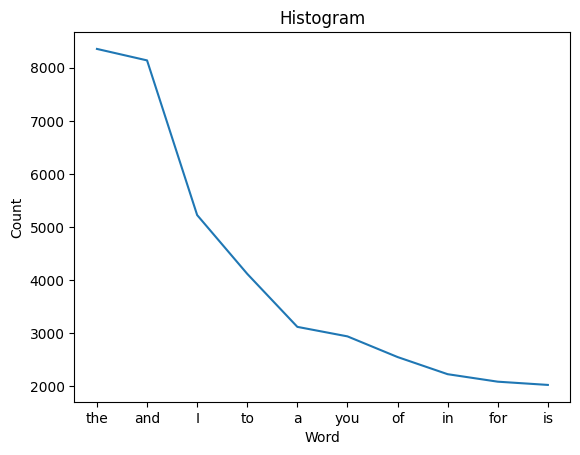

In [169]:
plot_data(dict(itertools.islice(number_of_each_words(all_tweets_word_broken).items(), 10)), '../stats/top_unique_words.png')